In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Grab and process the raw data.
amazon_reviews_df= pd.read_csv('amazon_cells_labelled.txt', sep='\t', header=None)
#sms_raw = pd.read_csv(reviews, delimiter= '\t', header=None)
amazon_reviews_df.columns = ['review_text', 'review_status']

#0 = bad review, 1 = good review 

print(amazon_reviews_df)

                                           review_text  review_status
0    So there is no way for me to plug it in here i...              0
1                          Good case, Excellent value.              1
2                               Great for the jawbone.              1
3    Tied to charger for conversations lasting more...              0
4                                    The mic is great.              1
5    I have to jiggle the plug to get it to line up...              0
6    If you have several dozen or several hundred c...              0
7          If you are Razr owner...you must have this!              1
8                  Needless to say, I wasted my money.              0
9                     What a waste of money and time!.              0
10                     And the sound quality is great.              1
11   He was very impressed when going from the orig...              1
12   If the two were seperated by a mere 5+ ft I st...              0
13                  

In [3]:
keywords = ['refund', 'return', 'garbage', 'negative', 'painful', 'not match', 'problem',
            'do not', 'junk', 'dissapointed', 'dissapoint','waste', 'wasted', 'time', 'fooled',  
            'problem', 'died', 'dead', 'dying' 'broke', 'breaks', 'broken', 'don\'t', 'won\'t',
            'will not', 'zero', 'hate', 'terrible', 'do not buy', 'too quiet', 'can\'t hear',
           'useless', 'crap', 'echo', 'plastic', 'unreliable', 'chinese', 'bad', 'not enough', 'badly', 'lousy',
           'wouldn\'t','couldn\'t', 'not', 'worst', 'crappy']



for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_reviews_df[str(key)] = amazon_reviews_df.review_text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
    amazon_reviews_df['allcaps'] = amazon_reviews_df.review_text.str.isupper()

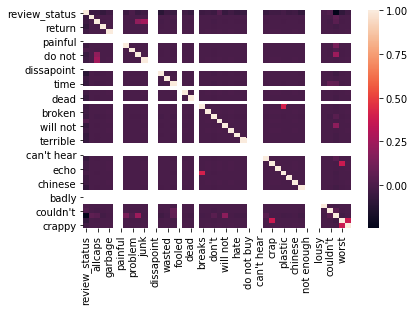

In [4]:
sns.heatmap(amazon_reviews_df.corr())

In [5]:
data = amazon_reviews_df[keywords + ['allcaps']]
target = amazon_reviews_df['review_status']

In [6]:
# data is biinary so use BernoulliNB function from sklearn.naive_bayes
from sklearn.naive_bayes import BernoulliNB


amazon_review_model = BernoulliNB()

# Fit our model to the data.
amazon_review_model.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = amazon_review_model.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

print("Predictive accuracy is : {}%".format(
    amazon_review_model.score(data, target) * 100
))

Number of mislabeled points out of a total 1000 points : 366
Predictive accuracy is : 63.4%


## Test on other model

In [7]:
# Grab and process the raw data.
yelp_reviews_df= pd.read_csv('yelp_labelled.txt', sep='\t', header=None)
#sms_raw = pd.read_csv(reviews, delimiter= '\t', header=None)
yelp_reviews_df.columns = ['review_text', 'review_status']

#0 = bad review, 1 = good review 

print(yelp_reviews_df)

                                           review_text  review_status
0                             Wow... Loved this place.              1
1                                   Crust is not good.              0
2            Not tasty and the texture was just nasty.              0
3    Stopped by during the late May bank holiday of...              1
4    The selection on the menu was great and so wer...              1
5       Now I am getting angry and I want my damn pho.              0
6                Honeslty it didn't taste THAT fresh.)              0
7    The potatoes were like rubber and you could te...              0
8                            The fries were great too.              1
9                                       A great touch.              1
10                            Service was very prompt.              1
11                                  Would not go back.              0
12   The cashier had no care what so ever on what I...              0
13   I tried the Cap

In [8]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_reviews_df[str(key)] = yelp_reviews_df.review_text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
    yelp_reviews_df['allcaps'] = yelp_reviews_df.review_text.str.isupper()
    
#setup data for model

yelpdata = yelp_reviews_df[keywords + ['allcaps']]
yelptarget = yelp_reviews_df['review_status']

#run model

yelp_review_model = BernoulliNB()

# Fit our model to the data.
yelp_review_model.fit(yelpdata, yelptarget)

# Classify, storing the result in a new variable.
yelp_y_pred = yelp_review_model.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != yelp_y_pred).sum()
))

print("Predictive accuracy is : {}%".format(
    yelp_review_model.score(data, target) * 100
))

Number of mislabeled points out of a total 1000 points : 390
Predictive accuracy is : 61.0%


# Writeup

I tried to incorporate function words such as 'not' and conditional verbs like 'would' and 'could' and their respective contractions as I thought these words word come up often. Other than that I included adjectives that seemed to pop up often. The predictive accuracy is about the same. I have about a 12% alpha with respect to a coin flip. I wonder what the upper limit of predictive power of this model,in this context is?